# Part C: Characterisation for your SDL (MacOS version)

In this notebook, you will learn more about the second step of an SDL: Characterisation.

Go to [sdl4kids.com](http://sdl4kids.com) for the Windows version.

If you have any questions, check out the [FAQ](https://sites.google.com/matterhorn.studio/sdl4kids/faq)!

## Introduction

We will look at all the building blocks required for measuring the RGB color on your screen, that you learned how to synthesise in Part B.

1. Setting up the microbit to measure colors
2. Programming the microbit to send measurements
3. Processing the measurements

## (1) Setting up the microbit to measure colors

We will use the enviro:bit (PIM355) by Pimoroni which is available for purchase [here](https://shop.pimoroni.com/products/enviro-bit?variant=3142289653770).

It is the most simple way to measure RGB colors with a microbit (or any microcontroller):
1. Plug the microbit into the board. Make sure you slide it in the right way (the side with 'envirobit' on it should be on the same side where it says 'microbit' on the microbit)
2. Then plug the microbit via USB into your computer.
3. Open MakeCode where we will program the microbit on [https://makecode.microbit.org/](https://makecode.microbit.org/) It works best in [Google Chrome](https://www.google.com/chrome/)
4. Click "New Project" and call it "SDL4Kids". You should now have the programming interface in front of you.

**Task**: If you are unfamiliar with the microbit, make sure to try some of the tutorials and smaller programming projects to make sure you understand the workflow.

## (2) Programming the Microbit to send new RGB color measurements

We will now program the microbit to send us RGB values:

1. In the middle column, somewhere between "Math" and "Variables" click on "Extensions".
2. Search for "envirobit", then click on it to load the envirobit library into your Microbit program.
3. User drag and drop to create below program into your Microbit.

![Microbit Program](img/microbit_program.png "Microbit Program")

5. Alternatively, you can copy and paste the following code into the "JavaScript" section (switch to JavaScript via its button in the middle of the top bar, NOT Python):
```
serial.onDataReceived(serial.delimiters(Delimiters.Comma), function () {
    serial.writeLine(envirobit.getGreen() + "-" + envirobit.getRed() + "-" + envirobit.getBlue())
    music.playTone(262, music.beat(BeatFraction.Sixteenth))
})
music.setVolume(127)
```


## (3) Connecting to the Microbit and requesting new measurements

**Note**: Ideally, you disconnect your Microbit from Google Chrome before continuing. Otherwise, Google Chrome will interfere with the serial connection and a lot of measurements will be corrupted.

Let's import the 'pyserial' package, which we use to connect to the Microbit (it is just called 'serial'):

In [1]:
!pip install pyserial


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import serial

We will list all USB devices currently connected to our computer:

In [3]:
!ls /dev/cu.*

/dev/cu.BLTH                    /dev/cu.usbmodem142102
/dev/cu.Bluetooth-Incoming-Port


Choose the one with 'cu.usbmodem' in its name and copy its FULL name into the code below:

In [4]:
ser = serial.Serial()
ser = serial.Serial("/dev/cu.usbmodem142102",115200, timeout=0.1)

The following lines of code will send a comma (",") to the microbit, which is our signal to it to send us the RGB measurements.

In [5]:
# 1. Send a comma to the microbit. The b in b"," indicates that it should be in bytecode
ser.write(b",")
# 2. We then read the response from the microbit. 
serial_data = str(ser.readline().decode('utf8')).rstrip()
serial_data

'116-135-124'

The first time will fail. On the second try, you should now see three numbers separated by a dash, like '115-92-103'.

**Task**: Move around the microbit and request new messages. Are the numbers changing? What colors can you measure?

## (4) Making the connection robust

Unfortunately, depending on your computer system, the serial USB connection between the microbit and computer might not be robust and messages will get corrupted.

To avoid these messages breaking our SDL, we will add a validation procedure:
1. If there are not exactly three numbers, we will measure again.
2. If the numbers are not between 0 and 255, we will measure again.

This procedure is not perfect, as the numbers themselves could be corrupted, but we will just have to accept that as measurement noise at this stage.

We will introduce a function called 'characterise' that returns the measured RBG color.

In [6]:
def characterise():
    valid = False
    while not valid:
        try:
            ser.flushInput()
            ser.write(b",")
            serial_data = str(ser.readline().decode('utf8')).rstrip()
            rgb = tuple([int(value) for value in serial_data.split("-")])
            # Validate: Measurement needs three entries
            if len(rgb) != 3:
                print(f"Measurement did not containt 3 RGB values:{rgb}")
                raise Exception()
            # Validate: Measurements need to be between 0 and 255
            if sum([0 <= x <= 255 for x in rgb]) != 3:
                print(f"Measurement outside valid range [0,255]:{rgb}")
                raise Exception()
            valid = True
        except Exception as e:
            print(f"Measurement invalid, will try again (error: {str(e)})")
    print(f"New RGB Measurement: {rgb}")
    return rgb

Let's give it a try:

In [7]:
characterise()

New RGB Measurement: (116, 136, 125)


(116, 136, 125)

Let's take 50 measurements:

In [8]:
for i in range(50):
    characterise()

New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (115, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
New RGB Measurement: (114, 134, 125)
N

Notice that we can take many hundreds of measurements per second, so if you do not move the microbit much, you will not see the numbers change much.

## (5) Putting it all together

We can now measure colors with the microbit using a function called 'characterise()'.

Let's take add this function into the code from the loop we programmed in Part B:

1. We will still generate random colors.
2. Instead of calculating the error in the computer, we will measure the color with the microbit.
3. Then we will calculate the error.

The change is very small, just one line:

In [9]:
import cv2
import numpy as np

import random #this package give us access to a function called 'randint(lowest, highest)'
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

import numpy as np # We import numpy so we can use it's square root function np.sqrt()
def calculate_error(color1, color2):
    return np.sqrt((color1[0] - color2[0]) ** 2 + (color1[1] - color2[1]) ** 2 + (color1[2] - color2[2]) ** 2)

# 1. Create a named window for display
cv2.namedWindow("Synthesis Window", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# 2. Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# 3.1 Define how many colors we want to show
max_iterations = 10

# 3.2 Let's define our goal color
goal_color = (0,0,255) # BGR order, not RGB

# 3.3 Create an empty list to store the error values
error_values = []

# 3.4 Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

for iteration in range(max_iterations):
    # 4. Generate a new random color
    current_color = generate_random_color()
    
    # 5.1 Update the live image with the current color
    image[:, :] = current_color
    
    # 5.2 Let's plot the goal color
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), goal_color, -1)
    
    # 5.3 Let's also calculate the difference between the MEASURED color and the goal
    current_color = characterise()
    current_color = tuple(reversed(current_color)) # We will have to flip the order from RGB to BGR
    error = calculate_error(goal_color, current_color)
    error_values.append(error)
    print(error)
    
    # 5.4. Add text information to the image
    text = f"Iteration: {iteration + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # 5.5 Add text for the error
    error_text = f"Loss: {error:.2f}"
    cv2.putText(image, error_text, (10, height - 10), font, font_scale, font_color, 2)

    # 5.6 Draw the graph of error values
    if len(error_values) > 1:
        for i in range(1, len(error_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(error_values[i - 1] * (height - 60) / max(error_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(error_values[i] * (height - 60) / max(error_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)
    
    # 6. Display the image again
    cv2.imshow("Live Image", image)
    
    # 8. Wait half a second
    cv2.waitKey(500) 
        
# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

New RGB Measurement: (114, 134, 124)
230.67943124604759
New RGB Measurement: (115, 132, 121)
227.29936207565564
New RGB Measurement: (103, 82, 122)
211.45212224047316
New RGB Measurement: (90, 83, 119)
219.71572542719832
New RGB Measurement: (107, 111, 64)
195.757503049053
New RGB Measurement: (107, 89, 100)
199.56202043475105
New RGB Measurement: (101, 73, 117)
206.72203559369282
New RGB Measurement: (89, 139, 110)
242.85180666406416
New RGB Measurement: (89, 120, 90)
223.7319825147938
New RGB Measurement: (117, 77, 91)
182.3567931281969


-1

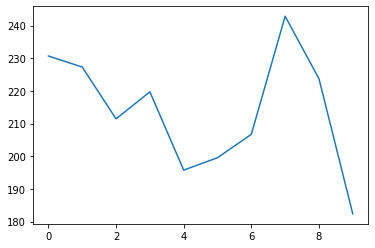

In [10]:
import matplotlib.pyplot as plt
plt.plot(error_values)

**Question**: Which RGB combination was closest to our goal color?

**Solution**: Check the loss graph for the combination with the smallest loss, i.e. it is closest to our goal color.

In [11]:
iteration_with_smallest_loss = error_values.index(min(error_values))
print("The smallest loss is " + str(error_values[iteration_with_smallest_loss]) + " with the iteration number of " + str(iteration_with_smallest_loss))

The smallest loss is 182.3567931281969 with the iteration number of 9


**Task**: Increase the number of iterations. Do the colors and their calcualted errors match with what you see?

### **Now it's time to move on to the third and final step of an SDL: Planning. Find it in the notebook "Part D"**